# Week 8 Jupyter Notebook Assignment
## Programming Historian: Introduction to stylometry with Python

* Student Name: Margael St Juste
* Date: 10/26/2019
* Instructor: Lisa Rhody
* Assignment due: 10/29/2019
* Methods of Text Analysis
* MA in DH / MS in Data Analysis and Visualization at The Graduate Center, CUNY

## Preparing for this week - Conceptualization
This week's assignment is going to veer more toward the technical than other weeks. We are going to read about a type of sylometric analysis called authorship attribution, and we're going to work through one of the most common authorship attribution tests in DH. There are questions to consider as you work through the exercise. Please read Patrick Juola _Authorship Attribution_ pages 233-271 before beginning this exercise. (Note: You will not understand all of it, especially the math. That's ok. The point here isn't to absorb all of it, but to get a sense of what features are being measured and what that measurement might consist of.) Next, complete this activity. When you are done going through this workbook, then read the Koolen and vanCranenburgh. Return to this notebook and insert 2 comments using markdown cells that show potential connections between Koolen and van Cranenburg's article and the work you've done here. 

Remember, next week Laura Mandell will be visiting us in class for the first half of next week, so you will want to quickly review her article, as well. There are intersections between her article, this activity, and the readings, as well.  

### The following notebook is much indebted to and grateful for Programming Historian, and in particular, François Dominic Laramée. 
François Dominic Laramée, "Introduction to stylometry with Python," The Programming Historian 7 (2018), https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python.

### The assignment
This week, you will be working through one of the most common authorship attribution activities: Assessing the likely authorship of the disputed essays in _The Federalist Papers_. As you do so, consider the readings that you have done and how they come into conversation with the methods in this activity. The assignment will work through three different approaches to the same question using 3 different assumptions about language and measuring. You may work together to run the cells of the notebooks, but individual assignments should be completed individually. 

Your comments should reflect your consideration of what is happening functionally and theoretically throughout each experiment. Consider the following questions to help you get started: 
* Why did the author pick this particular dataset? 
* What about the selection of the dataset makes sense? What does the selection of data tell us about the kind of questions the authors expect users to have about their data? 
* What are the assumptions that underlie the methods of each approach to authorship attribution? 
* Are there gendered inflections to these approaches? How so or why not? (Be sure to point to a specific cell. Give evidence from a secondary source to support your point of view.)
* How does the result of each experiment "answer" the question at hand? What appeal does the article make toward the authority or correctness of the answer? 
* What considerations about topic, location, or other frequent signaling words has the author given? How does this relate to Juola's introduction? 
* What is the signifcance of this as one of the primary examples of authorship attribution analysis? Why might we want to consider an example like this in a course focusing on feminist text analysis? 

### Directions: 
* To complete this lesson, go to the Programming Historian Lesson: [Introduction to sylometry with Python by François Dominic Laramée](https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python#calculating-features-and-z-scores-for-our-test-case) using your web browser. Keep this notebook page open on one side of your monitor and follow along with the Programming Historian lesson on the other side of your screen/monitor. 
* Download the zip file in the section titled [The Dataset](https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python#the-dataset). 
* Note: This Jupyter Notebook should be saved in the same folder as your Dataset folder.  
* The nltk.download('punkt') step may be overkill, but don't worry if it is. I think we have already downloaded it. 
* Add new cells above and below the cells you are annotating and type your annotations in mark down. 
* When you are done, you will need to submit a PDF copy of your notebook assignment. (You can produce a copy of your assignment by going to File --> Print Preview --> Save As --> PDF.) 
* Alternately, name your file with your last name and the date, and then send a copy to me before the start of class. 



## Historical Context

As Patrick Juola writes: "Authorship Attribution is about ownership of words." What is at stake when we embark upon a process of trying to assign ownership to words? 

A lot is at stake when we try to assign ownership to words. Finding the correct author of a piece of writing may be the deciding factor in a criminal/legal case, establish the origin of important historical documents, help understand linguistic varations among the speakers of a language, or it could be simply fulfill a literary curiosity.

## Data Import and Preparation

In [1]:
import nltk
nltk.download('punkt')
import matplotlib

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Margael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24, 
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}


In [3]:
# A function that compiles all of the text files associated with a single author into a single string
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'federalist_{filename}.txt') as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [4]:
# Make a dictionary out of the authors' corpora
federalist_by_author = {}  
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)

In [15]:
for author in papers: 
    print(federalist_by_author[author][:100])

 10

The Same Subject Continued (The Union as a Safeguard Against Domestic
Faction and Insurrection)
 1

General Introduction

For the Independent Journal. Saturday, October 27, 1787


HAMILTON

To the
 2

Concerning Dangers from Foreign Force and Influence

For the Independent Journal. Wednesday, Oct
 18

The Same Subject Continued (The Insufficiency of the Present
Confederation to Preserve the Unio
 49

Method of Guarding Against the Encroachments of Any One Department of
Government by Appealing t
 64

The Powers of the Senate

From The Independent Journal. Wednesday, March 5, 1788.

JAY

To the 


## First Stylometric Test: Mendenhall's Characteristic Curves of Composition

What is being measured? How? What assumptions are translated into measurable functions? 

the distribution of token lengths is being measured. The x-variable samples was not well defined enough for me to understand if the sample corresponded to a rank, value, or referring to the title number. I interpreted the graph to display the elasticity of the author usage of word of x-length. In that case, the use of shorter words appeared to have the most inelasticity of usage, which according to Juola, are likely to be function words. The longer words have the most elasticity and the least probability of repetition.

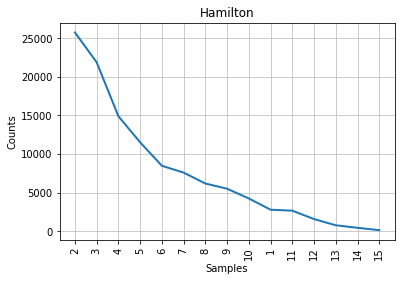

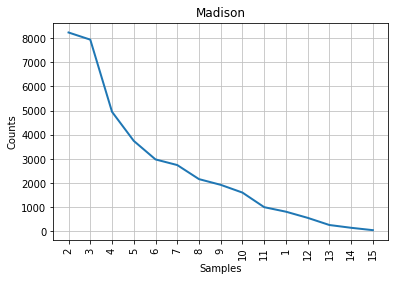

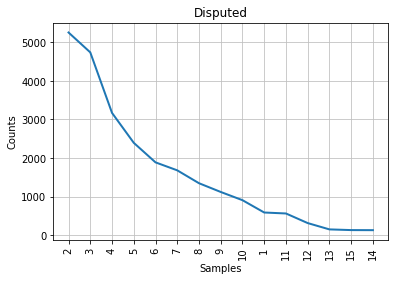

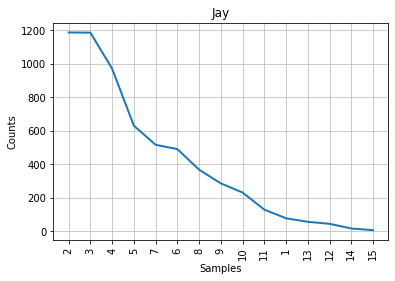

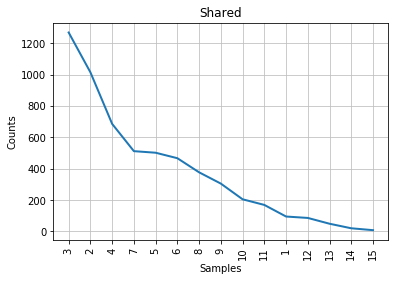

In [5]:
%matplotlib inline

# Compare the disputed papers to those written by everyone, 
# including the shared ones. 
authors = ("Hamilton", "Madison", "Disputed", "Jay", "Shared")

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(federalist_by_author[author])
    
    # Filter out punctuation
    federalist_by_author_tokens[author] = ([token for token in tokens 
                                            if any(c.isalpha() for c in token)])
   
    # Get a distribution of token lengths
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    federalist_by_author_length_distributions[author].plot(15,title=author)     

## Second Stylometric Test: Kilgariff's Chi-Squared Method

What is a probability distribution? What does "distance" mean in the way that it is used here? Pay particular attention to the bulleted explanation of how the statistic is applied. In the following section, the code is all written together. See if you can comment out what is happening at each stage and why it matters. 

In the first step we are naming the authors to be included in the analysis. secondly, we normalize all the tokens so that everything is lowercased. Then, we combine each author's list with the Disputed list. Then we apply the FredDist function to the combined lists. We create a new list called most common based on the 500 most commmon words in each combined list.We then find the ratio of the authors words to that of the entire list. The disputed ratio must the remaining ratio. We find each author's count and the disputed count. We then measure the distance from the algebraic formula. Madison has a chisquared closer to 0 which makes him the most likely author of the two according to this method.

In [6]:
# Who are the authors we are analyzing?
authors = ("Hamilton", "Madison")

# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    federalist_by_author_tokens[author] = (
        [token.lower() for token in federalist_by_author_tokens[author]])
federalist_by_author_tokens["Disputed"] = (
    [token.lower() for token in federalist_by_author_tokens["Disputed"]])

# Calculate chisquared for each of the two candidate authors
for author in authors:
   
    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (federalist_by_author_tokens[author] + 
                    federalist_by_author_tokens["Disputed"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    # What proportion of the joint corpus is made up 
    # of the candidate author's tokens?
    author_share = (len(federalist_by_author_tokens[author]) 
                    / len(joint_corpus))
    
    # Now, let's look at the 500 most common words in the candidate 
    # author's corpus and compare the number of times they can be observed 
    # to what would be expected if the author's papers 
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:
        
        # How often do we really see this common word?
        author_count = federalist_by_author_tokens[author].count(word)
        disputed_count = federalist_by_author_tokens["Disputed"].count(word)
        
        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)
        
        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) * 
                       (author_count-expected_author_count) / 
                       expected_author_count)
                    
        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count) 
                       / expected_disputed_count)
        
    print("The Chi-squared statistic for candidate", author, "is", chisquared)

The Chi-squared statistic for candidate Hamilton is 3434.6850314768426
The Chi-squared statistic for candidate Madison is 1907.5992915766838


## Third Stylometric Test: John Burrows' Delta Method (Advanced)

In [7]:
# Who are we dealing with this time?
authors = ("Hamilton", "Madison", "Jay", "Disputed", "Shared")

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += federalist_by_author_tokens[author]
    
# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
whole_corpus_freq_dist[ :10 ]

[('the', 17745),
 ('of', 11795),
 ('to', 6999),
 ('and', 5012),
 ('in', 4383),
 ('a', 3957),
 ('be', 3770),
 ('that', 2739),
 ('it', 2492),
 ('is', 2177)]

In [8]:
# The main data structure
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {} 
    
    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(federalist_by_author_tokens[author])
    
    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = federalist_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall

In [9]:
import math

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean 
    # and standard deviation
    corpus_features[feature] = {}
    
    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average
    
    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

In [10]:
feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:
        
        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) / 
                                            feature_stdev)

In [11]:
# Tokenize the test case
testcase_tokens = nltk.word_tokenize(federalist_by_author["TestCase"])
    
# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens 
                   if any(c.isalpha() for c in token)]
 
# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall
    
# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature the is -0.5905131029403456
Test case z-score for feature of is -1.815053228501068
Test case z-score for feature to is 1.080722357197572
Test case z-score for feature and is 1.0546002678666273
Test case z-score for feature in is 0.7425341727883432
Test case z-score for feature a is -0.7962692057857793
Test case z-score for feature be is 1.0279650702511498
Test case z-score for feature that is 1.9604023041278147
Test case z-score for feature it is 0.21265791060592468
Test case z-score for feature is is -0.8792324482592065
Test case z-score for feature which is -2.059010144513673
Test case z-score for feature by is 1.2185982163454618
Test case z-score for feature as is 4.556093784647465
Test case z-score for feature this is -0.651311983665639
Test case z-score for feature not is 0.8424621292127045
Test case z-score for feature would is -0.8419452065894578
Test case z-score for feature for is -0.84301315697513
Test case z-score for feature have is 2.3422900648

In [12]:
for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] - 
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )

Delta score for candidate Hamilton is 1.7560432408322548
Delta score for candidate Madison is 1.5981882978381434
Delta score for candidate Jay is 1.5159420162682575
Delta score for candidate Disputed is 1.535744690035478
Delta score for candidate Shared is 1.9064655212964878


## Conclusions and Further Reading and Resources

Consider one of the "Interesting case studies" at the end of the lesson. What are the opportunities / stakes that authorship attribution raises in each case? Are there cases when authorship attribution may not make sense to do? Are there ethical implications? How might/could authorship attribution participate in cultural or archival recovery projects? 

Looking at two cases of using the chisquared and delta methods, there are many stakes involved in the authorship attributions. Each requires very in depth knowledge of the statistical models used. Each required merging copora and creating dictionaries of words in order to compare frequecy distributions. the authorship attribution in this case was supported by the vast amount of corpora available from these political writers. Had there not been a substantial library of writing to compare, it would not make sense to do the authorship attribution for such important documents. Ethical implication includes the researcher's bias who may have preemptively categorized each writer into a political ideology which may or may not align with the sentiments of the Federalist papers, like I did. Authorship attribution can be a great tool for archival recovery project provided that the data collection and computational process is carefully vetted for bias and the corpora is sufficiently accessible.